<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Countplot" data-toc-modified-id="Countplot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Countplot</a></span></li><li><span><a href="#Barplot" data-toc-modified-id="Barplot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Barplot</a></span></li><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Boxplot</a></span></li><li><span><a href="#Violinplot" data-toc-modified-id="Violinplot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Violinplot</a></span></li><li><span><a href="#Swarmplot" data-toc-modified-id="Swarmplot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Swarmplot</a></span></li><li><span><a href="#Boxenplot" data-toc-modified-id="Boxenplot-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Boxenplot</a></span></li><li><span><a href="#Lineplot" data-toc-modified-id="Lineplot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Lineplot</a></span></li></ul></div>

# Countplot

A simple plot, it merely shows the total count of rows per category. 

In [1]:
# Seaborn - simple with tips data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
%matplotlib inline

print(sns.get_dataset_names())



['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [2]:
# Seaborn - annotate
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


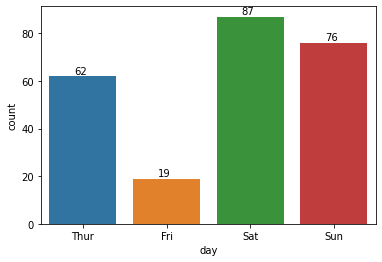

In [9]:
fig, ax = plt.subplots()
ax = sns.countplot(x='day', data=tips)
for p in ax.patches:
    ax.annotate (  p.get_height(), (  p.get_x() + .3 , p.get_height() + 1      ) )

<AxesSubplot:xlabel='day', ylabel='count'>

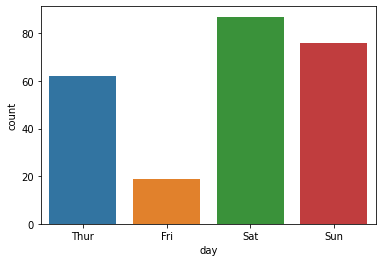

In [11]:
# Seaborn - alt syntax
import warnings
warnings.filterwarnings('ignore')
sns.countplot(tips['day'])

<AxesSubplot:xlabel='day', ylabel='count'>

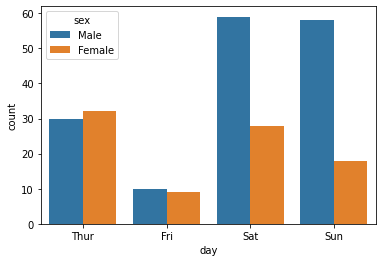

In [12]:
# Seaborn - groupby()-like use of hue=   size=  style=
sns.countplot( x='day', data=tips, hue='sex')

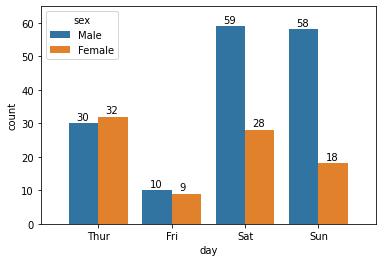

In [33]:
# Upgrading annotation aesthetics
fig, ax = plt.subplots()

ax = sns.countplot(x='day', data=tips, hue='sex')

# for p in ax.patches:
#     ax.annotate( p.get_height(), #what we add
#                  (p.get_x() + .01,  #x-element of tuple (x-coord)
#                   p.get_height() + .2  #y-element of tuple (y-coord) 
#                  )
#                )

plt.margins(x=.1, y=.1)
for p in ax.patches:
    height = p.get_height()
    ax.annotate( height, #what we add
                 (p.get_x() + .1,  #x-element of tuple (x-coord)
                  height + 1  #y-element of tuple (y-coord) 
                 )
               )
    
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate( "Quinn!", #what we add
#                  (p.get_x() + .8,  #x-element of tuple (x-coord)
#                   height + 2  #y-element of tuple (y-coord) 
#                  )
#                )    

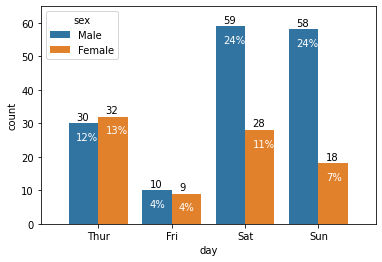

In [37]:
fig, ax = plt.subplots()

ax = sns.countplot(x='day', data=tips, hue='sex')

total_tips = tips.day.count()

plt.margins(x=.1, y=.1)

for p in ax.patches:
    height = p.get_height()
    xval = p.get_x()
    ax.annotate( height, #what we add
                 (xval + .1,  #x-element of tuple (x-coord)
                  height + 1  #y-element of tuple (y-coord) 
                 )
               )
    ax.text(xval+0.1,                # x-coordinate
             height-5,               # y-coordinate
             f'{(height/total_tips):.0%}', #what
             color = 'w'             #color
             )

In [13]:
# Countplot with MPG Data

In [39]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot:xlabel='model_year', ylabel='count'>

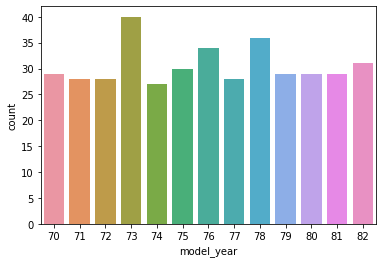

In [40]:
sns.countplot(x='model_year', data=mpg)

In [42]:
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

<AxesSubplot:xlabel='model_year', ylabel='count'>

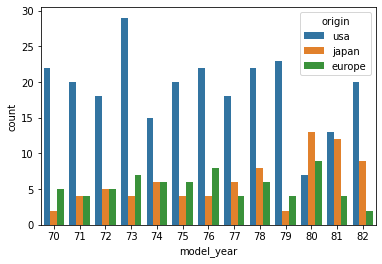

In [43]:
sns.countplot(x='model_year', hue='origin', data=mpg)

# Barplot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

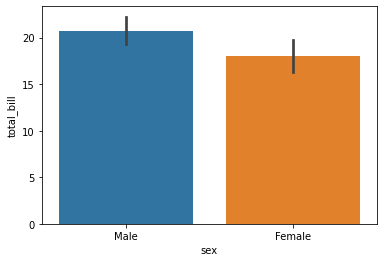

In [44]:
# barplot with tips data
sns.barplot(x='sex', y='total_bill', data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

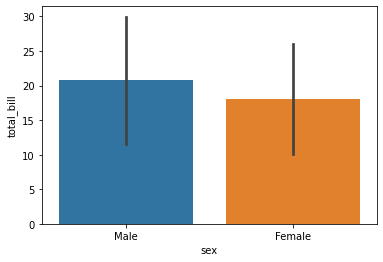

In [48]:
sns.barplot(x='sex', y='total_bill', data=tips, ci='sd')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

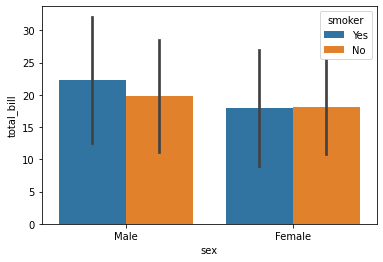

In [49]:
# work with hue
sns.barplot(x='sex', y='total_bill', data=tips, ci='sd', hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

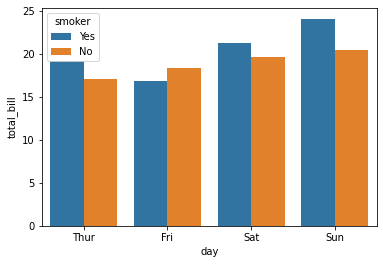

In [51]:
# work with hue
sns.barplot(x='day', y='total_bill', data=tips, ci=None, hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

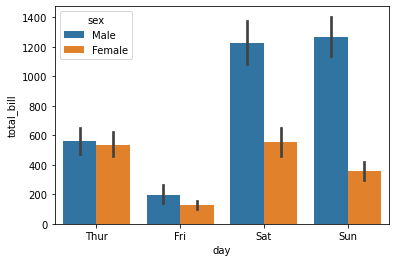

In [52]:
sns.barplot(x='day', y='total_bill', data=tips, hue='sex', estimator=np.sum)

In [17]:
# work with different estimators (agg functions)

In [18]:
# demonstrate diffs between barplot and countplot

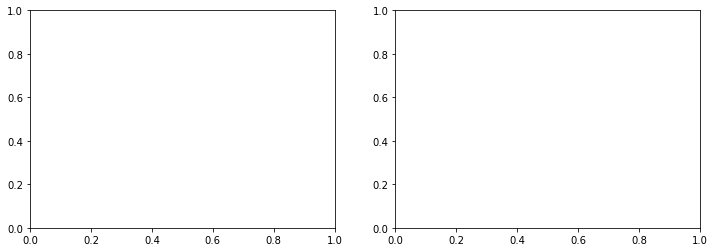

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

In [55]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

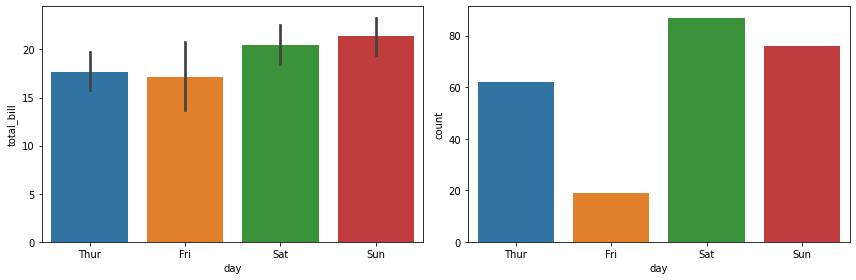

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x='day', y='total_bill', data=tips, ax=ax[0])
sns.countplot(x='day', data=tips, ax=ax[1])
plt.tight_layout()

# Boxplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

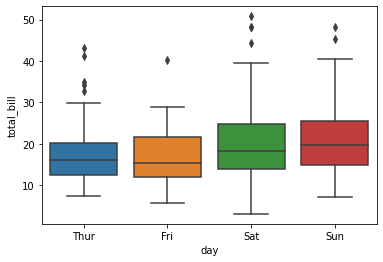

In [59]:
# defaults
sns.boxplot(x='day', y='total_bill', data=tips)

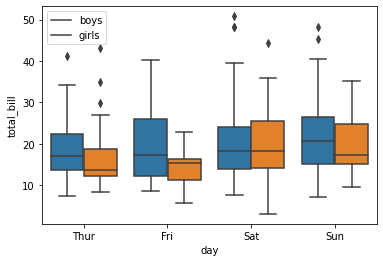

In [61]:
# legend content and location
ax = sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')
ax.legend( [ 'boys', 'girls'  ]   )

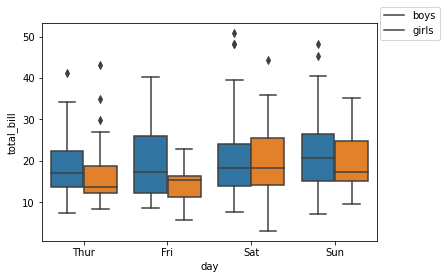

In [65]:
ax = sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')
#            list-like new, bbox_to_anchor(x-offset, y_offset)
plt.legend(['boys', 'girls'], bbox_to_anchor=(1.1, 1), loc=10, borderaxespad=0.)   

#loc=  options

#             'best'            0
#             'upper right'     1
#             'upper left'      2
#             'lower left'      3
#             'lower right'     4
#             'right'           5
#             'center left'     6
#             'center right'    7
#             'lower center'    8
#             'upper center'    9
#             'center'          10

#help(plt.legend)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

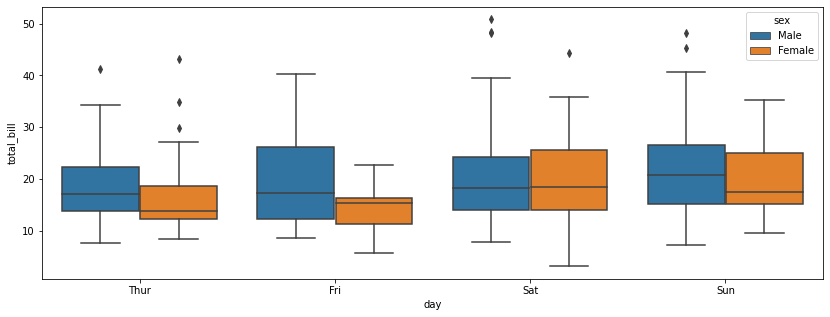

In [67]:
# expand the figure size
plt.figure(figsize=(14, 5))
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

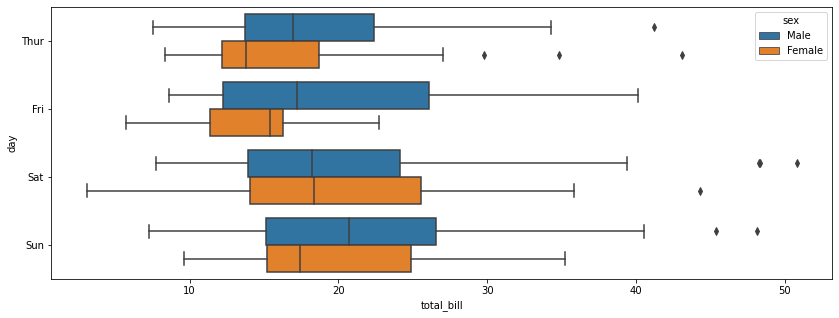

In [72]:
# change the orientation
plt.figure(figsize=(14, 5))
sns.boxplot(y='day', x='total_bill', data=tips, hue='sex', orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

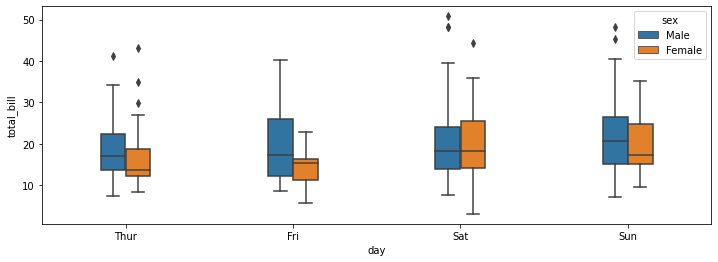

In [73]:
# change the display width of the bars
plt.figure(figsize=(12, 4))
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex', width=.3)

# Violinplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

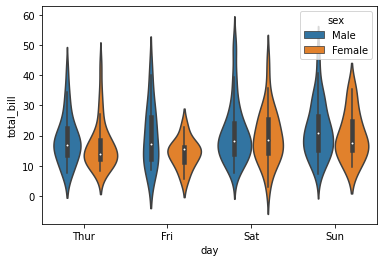

In [74]:
# defaults (distribution)
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex')

In [25]:
# add hue

<AxesSubplot:xlabel='day', ylabel='total_bill'>

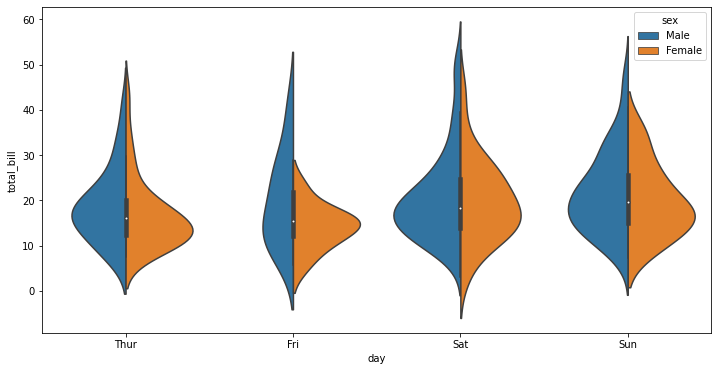

In [75]:
# combine categories M/F
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

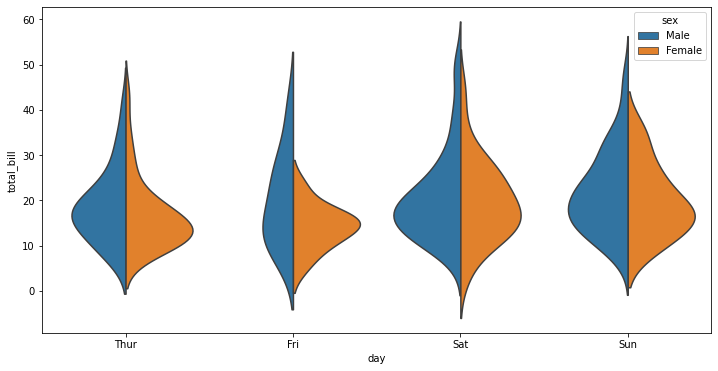

In [76]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True, inner=None)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

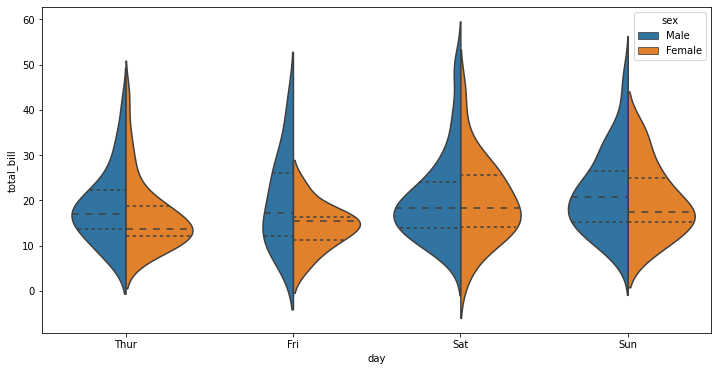

In [77]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True, inner='quartile')

In [27]:
# control display the internal 'box' elements

<AxesSubplot:xlabel='total_bill', ylabel='day'>

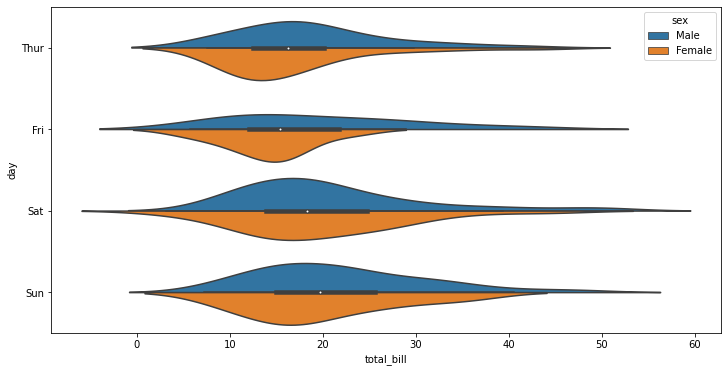

In [79]:
# control the orientation with parameter shift
plt.figure(figsize=(12,6))
sns.violinplot(y='day', x='total_bill', data=tips, hue='sex', split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

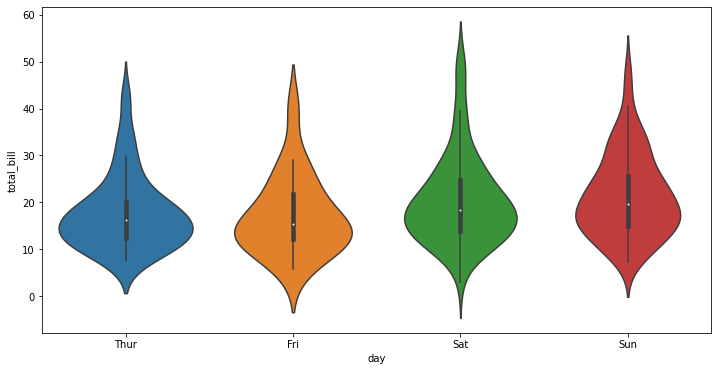

In [80]:
# control the bandwidth (resolution)
plt.figure(figsize=(12, 6))
sns.violinplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

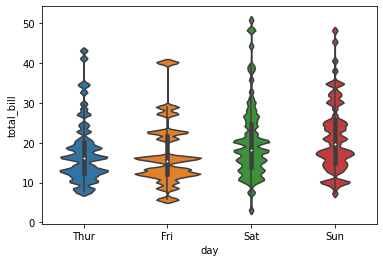

In [83]:
sns.violinplot(x='day', y='total_bill', data=tips, bw=0.05)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

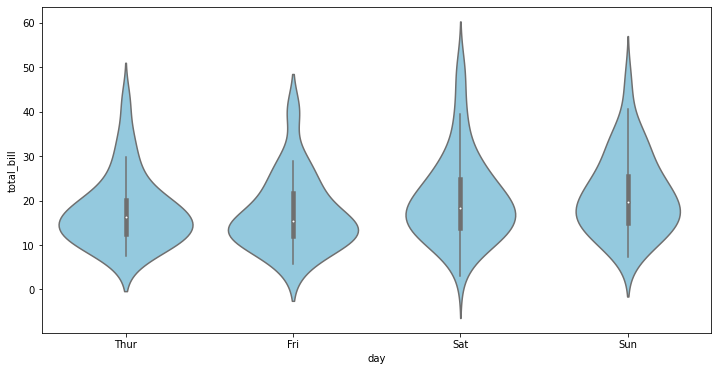

In [85]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y='total_bill', data=tips, bw=.5, color='skyblue')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

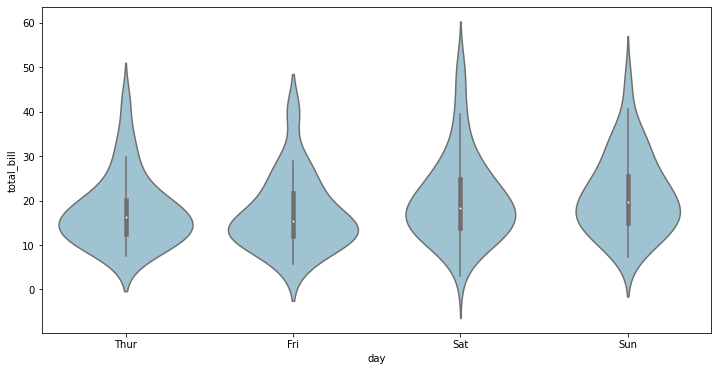

In [86]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y='total_bill', data=tips, bw=.5, color='skyblue', saturation=.5)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

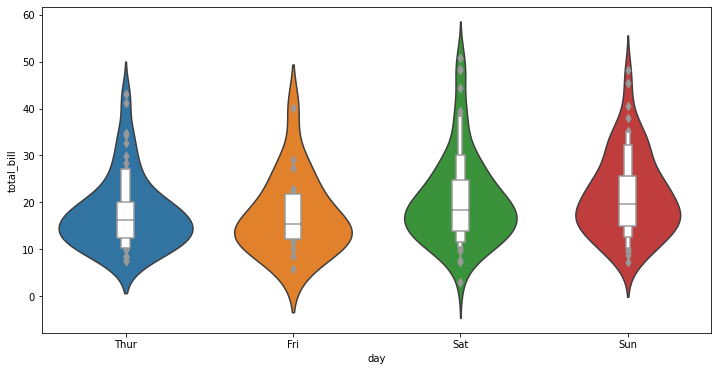

In [88]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y='total_bill', data=tips, inner=None)
sns.boxenplot(x='day', y='total_bill', data=tips, width=.1, color='w')


In [ ]:
# control color of the inside 'box' elements

# Swarmplot

<AxesSubplot:xlabel='total_bill'>

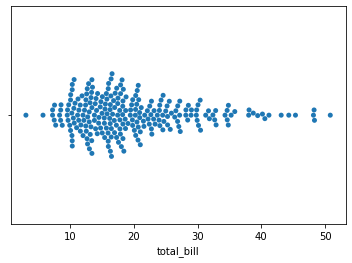

In [89]:
# defaults 
sns.swarmplot(x='total_bill', data=tips)

<AxesSubplot:xlabel='total_bill'>

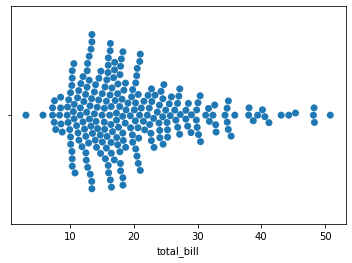

In [90]:
# control marker size=
sns.swarmplot(x='total_bill', data=tips, size=7)

<AxesSubplot:xlabel='total_bill'>

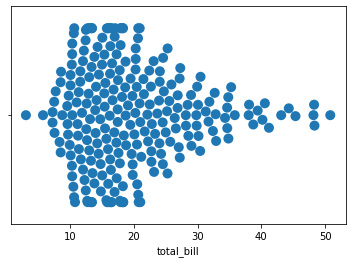

In [93]:
sns.swarmplot(x='total_bill', data=tips, size=10)

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

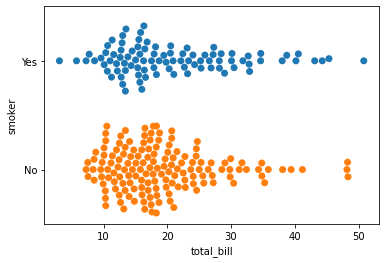

In [94]:
sns.swarmplot(x='total_bill', data=tips, y='smoker', size=7)

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

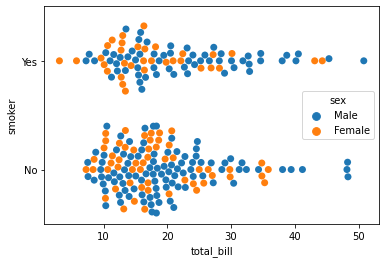

In [95]:
# split data with hue=
sns.swarmplot(x='total_bill', y='smoker', hue='sex', data=tips, size= 7)

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

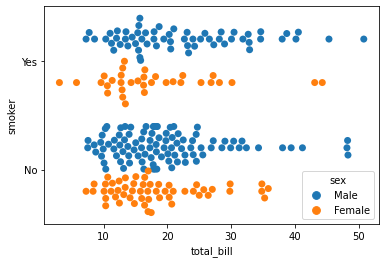

In [96]:
sns.swarmplot(x='total_bill', y='smoker', hue='sex', data=tips, size= 7, dodge=True)

In [33]:
# split AND separate the data with dodge=

# Boxenplot

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

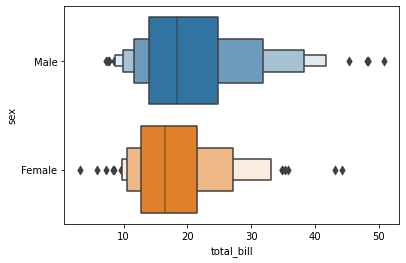

In [98]:
# defaults 'alphabet plots'
#  quartile   "quar" means roughly 4
#  quintile   "quin" means 5
#  decile     "dec" means 10
#  quantile   unspecified number of 'cuts'
#
sns.boxenplot(x='total_bill', y='sex', data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

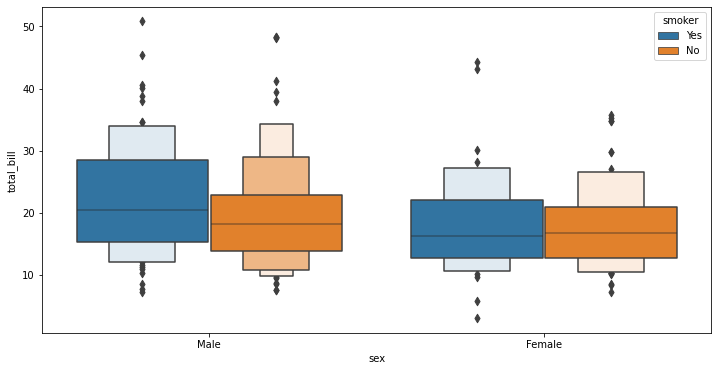

In [101]:
# switch orientation via parameter switch
plt.figure(figsize=(12,6))
sns.boxenplot(y='total_bill', x='sex', data=tips, hue = 'smoker')

In [36]:
# split data with hue=

# Lineplot

<AxesSubplot:xlabel='year', ylabel='passengers'>

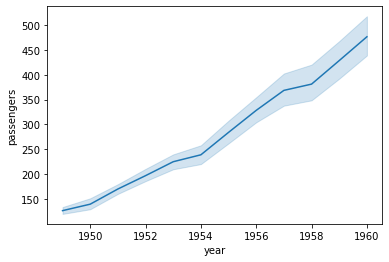

In [104]:
# defaults
flights = sns.load_dataset("flights")
flights.head()

sns.lineplot(x='year', y='passengers', data=flights, ci=95)

<AxesSubplot:xlabel='year', ylabel='passengers'>

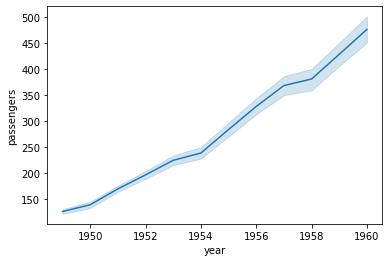

In [106]:
sns.lineplot(x='year', y='passengers', data=flights, ci=75)

<AxesSubplot:ylabel='passengers'>

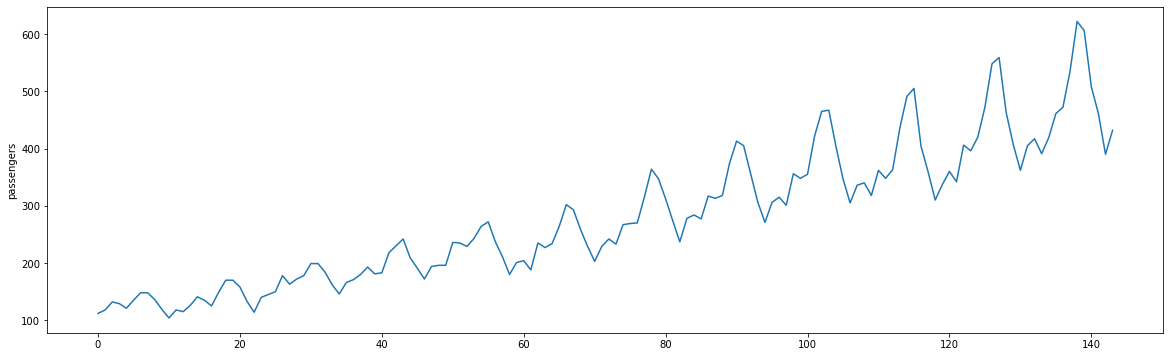

In [107]:
# inline aggregation of data and index selections
f_sum = flights.groupby(["year","month"]).sum()

plt.figure(figsize=(20,6))

sns.lineplot(x=f_sum.reset_index().index, y=f_sum.passengers )

In [108]:
# use of pivot table (multi-indexed) data
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='year'>

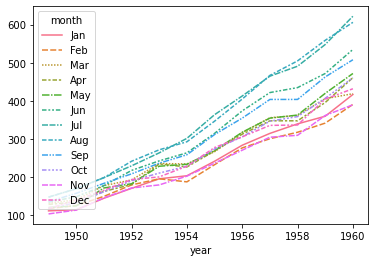

In [109]:
sns.lineplot(data=flights_wide)